In [1]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import json
import numpy as np
import glob
from tqdm.notebook import tqdm
from texttable import Texttable
import matplotlib.pyplot as plt

In [2]:
site_data_paths = glob.glob(os.path.join('data2', 'output', 'features', 'train', '*'))

In [10]:
feauter_dfs = list()
for data_path in tqdm(site_data_paths):
    feauter_dfs.append(pd.read_csv(data_path))

  0%|          | 0/24 [00:00<?, ?it/s]

In [4]:
feauter_dfs[0]

,2e5e319377bfd4678407b9060b825ada614f13f9,9d3d4b885a2477d90d3e54a6d2408637ea21fc09,a02f4615742c700b40222d78c416e5c61544513f,5bc24158fff7ca051eed8c0aed6408fa6b9d0271,575aee593cec75c5bcf809861e03064182c4c680,8ef36b90e7940363abc71814f9e572414f593a76,c4cb0c76011c72c848846607e71aa4e89956bae5,9c0d38e71d25bd4d899b2cd5f8e06ae8665e1eac,058c29e68ef40b50f3e6a0d26f43391d3b4ac315,3bdcad01934cd09e8cffe34e8a2468ed0fd1f43a,...,b76481fd7021b8ad9ca94ea59a0d6f974adec108,78fb989d22ece16d9887cc9a7687c35011703bc2,97d337bb5e21a20f10505d9b1d2b5a16bfbf6151,2f5d69532fc1dbe2964bde18edad2748983eaeb3,4e29706f6e2c281477bf89f2376e0da14bb9f04d,x,y,floor,path,sys_ts
0,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,186.17432,32.11038,1,5dc92809efaf870006bad708,1573462234097
1,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,183.51108,30.73431,1,5dc92809efaf870006bad708,1573462235991
2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,183.51108,30.73431,1,5dc92809efaf870006bad708,1573462237879
3,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,183.51108,30.73431,1,5dc92809efaf870006bad708,1573462239786
4,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,183.51108,30.73431,1,5dc92809efaf870006bad708,1573462241672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17198,-75,-79,-77,-74,-88,-87,-79,-83,-79,-84,...,-999,-999,-999,-999,-999,157.48116,246.42839,-1,5ddccefd29dff70006248e00,1574751981224
17199,-68,-76,-78,-68,-87,-86,-76,-83,-77,-91,...,-999,-999,-999,-999,-90,164.04048,249.67061,-1,5ddccefd29dff70006248e00,1574751983181
17200,-71,-72,-73,-70,-88,-88,-71,-83,-71,-91,...,-999,-999,-999,-999,-90,164.04048,249.67061,-1,5ddccefd29dff70006248e00,1574751985146
17201,-74,-78,-75,-76,-89,-90,-82,-83,-80,-91,...,-999,-999,-999,-999,-90,164.04048,249.67061,-1,5ddccefd29dff70006248e00,1574751987149


In [6]:
def create_df_split(feauter_df):
    df = feauter_df.copy()
    Y_np = df['floor'].to_numpy()

    df.drop(['x', 'y', 'floor', 'path', 'sys_ts'], axis=1, inplace=True)
    X_np = df.to_numpy()
    
    X_train, X_val, Y_train, Y_val = train_test_split(X_np, Y_np, test_size = 0.2)
    del df
    return X_train, X_val, Y_train, Y_val

In [21]:
clf_data = [
    ('Decision Tree', DecisionTreeClassifier, {}),
    ('Extra Tree', ExtraTreeClassifier, {}),
    #('Random Forest 20', RandomForestClassifier, {'n_estimators': 20}),
    #('Random Forest 60', RandomForestClassifier, {'n_estimators': 60}),
    ('Random Forest 100', RandomForestClassifier, {'n_estimators': 100}),
    #('Extra Trees 20', ExtraTreesClassifier, {'n_estimators': 20}),
    #('Extra Trees 60', ExtraTreesClassifier, {'n_estimators': 60}),
    ('Extra Trees 100', ExtraTreesClassifier, {'n_estimators': 100}),
    ('AdaBoost', AdaBoostClassifier, {'base_estimator': DecisionTreeClassifier(), 'n_estimators': 20}),
]

In [23]:
for i in tqdm(range(1)):
    feauter_df = feauter_dfs[1]
    X_train, X_val, Y_train, Y_val = create_df_split(feauter_df)
    
    print(f"Site: {site_data_paths[1].split('/')[-1][:-4]}")
    print(f"BSSIDs num:\t\t{X_train.shape[1]}")
    print(f"Mesurments num:\t\t{X_train.shape[0] + X_val.shape[0]}")
    
    cv_acc = list()
    val_acc = list()
    
    for clf_name, clf_class, clf_params in tqdm(clf_data):
        clf = clf_class(**clf_params)
        
        clf.fit(X_train, Y_train)
        cv_acc.append(np.mean(cross_val_score(clf, X_train, Y_train, cv=5)))
        
        Y_pred = clf.predict(X_val)
        val_acc.append(accuracy_score(Y_val, Y_pred))
    
    t = Texttable()
    t.add_rows([[x[0] for x in clf_data], cv_acc, val_acc])
    print(t.draw())
    
    print()
    print()

  0%|          | 0/1 [00:00<?, ?it/s]

Site: 5d2709b303f801723c327472
BSSIDs num:		614
Mesurments num:		15358


  0%|          | 0/5 [00:00<?, ?it/s]

+---------------+------------+-------------------+-----------------+----------+
| Decision Tree | Extra Tree | Random Forest 100 | Extra Trees 100 | AdaBoost |
+===============+============+===================+=================+==========+
| 0.982         | 0.982      | 1                 | 1               | 1        |
+---------------+------------+-------------------+-----------------+----------+
| 0.983         | 0.985      | 1.000             | 1.000           | 1.000    |
+---------------+------------+-------------------+-----------------+----------+




In [13]:
X_train, X_val, Y_train, Y_val = create_df_split(feauter_dfs[4])
clf = ExtraTreesClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_val)
confusion_matrix(Y_val, Y_pred)

array([[ 682,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1278,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1067,    0,    0,    0,    0,    0],
       [   0,    0,    0,  858,    1,    0,    0,    0],
       [   0,    0,    0,    0,  669,    0,    0,    0],
       [   0,    0,    0,    0,    0,  113,    0,    1],
       [   0,    0,    0,    0,    0,    0,   28,    0],
       [   0,    0,    0,    0,    0,    0,    0,   36]])

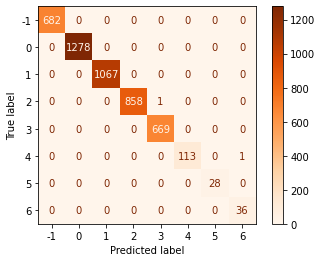

In [26]:
fig = plot_confusion_matrix(clf, X_val, Y_val, cmap=plt.cm.Oranges)
plt.savefig('confusion_matrix.png')
plt.show()

###### 